# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [239]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [240]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [241]:
#  1. Get the total rides for each city type

total_rides_urban = pyber_data_df[(pyber_data_df.type =='Urban')].count()['ride_id']
total_rides_suburban = pyber_data_df[(pyber_data_df.type =='Suburban')].count()['ride_id']
total_rides_rural = pyber_data_df[(pyber_data_df.type =='Rural')].count()['ride_id']

print(total_rides_urban,total_rides_suburban,total_rides_rural)

1625 625 125


In [242]:
# 2. Get the total drivers for each city type

total_drivers_urban = city_data_df[(city_data_df.type =='Urban')].sum()['driver_count']
total_drivers_suburban = city_data_df[(city_data_df.type =='Suburban')].sum()['driver_count']
total_drivers_rural = city_data_df[(city_data_df.type =='Rural')].sum()['driver_count']

print(total_drivers_urban,total_drivers_suburban,total_drivers_rural)

2405 490 78


In [243]:
#  3. Get the total amount of fares for each city type
total_fares_urban = pyber_data_df[(pyber_data_df.type =='Urban')].sum()['fare']
total_fares_suburban = pyber_data_df[(pyber_data_df.type =='Suburban')].sum()['fare']
total_fares_rural = pyber_data_df[(pyber_data_df.type =='Rural')].sum()['fare']

print(total_fares_urban,total_fares_suburban,total_fares_rural)

39854.380000000005 19356.33 4327.929999999999


In [244]:
#  4. Get the average fare per ride for each city type. 
avg_fares_urban = pyber_data_df[(pyber_data_df.type =='Urban')].mean()['fare']
avg_fares_suburban = pyber_data_df[(pyber_data_df.type =='Suburban')].mean()['fare']
avg_fares_rural = pyber_data_df[(pyber_data_df.type =='Rural')].mean()['fare']

print(avg_fares_urban,avg_fares_suburban,avg_fares_rural)

24.52577230769236 30.97012800000002 34.623440000000016


C:\Users\Jennings\AppData\Local\Temp\ipykernel_33916\4077339204.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_fares_urban = pyber_data_df[(pyber_data_df.type =='Urban')].mean()['fare']
C:\Users\Jennings\AppData\Local\Temp\ipykernel_33916\4077339204.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_fares_suburban = pyber_data_df[(pyber_data_df.type =='Suburban')].mean()['fare']
C:\Users\Jennings\AppData\Local\Temp\ipykernel_33916\4077339204.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before cal

In [245]:
# 5. Get the average fare per driver for each city type. 
avg_fares_driver_urban = total_fares_urban/total_drivers_urban
avg_fares_driver_suburban = total_fares_suburban/total_drivers_suburban
avg_fares_driver_rural = total_fares_rural/total_drivers_rural

print(avg_fares_driver_urban,avg_fares_driver_suburban,avg_fares_driver_rural)

16.571467775467777 39.50271428571429 55.486282051282046


In [246]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'type':['Urban','Suburban','Rural'],
'Total Rides':[total_rides_urban,total_rides_suburban,total_rides_rural],
'Total Drivers':[f'{total_drivers_urban:,}',f'{total_drivers_suburban:,}',f'{total_drivers_rural:,}'],
'Total Fares':[f'${total_fares_urban:,.2f}',f'${total_fares_suburban:,.2f}',f'${total_fares_rural:,.2f}'],
'Average Fare per Ride':[f'${avg_fares_urban:.2f}',f'${avg_fares_suburban:.2f}',f'${avg_fares_rural:.2f}'],
'Average Fare per Driver':[f'${avg_fares_driver_urban:.2f}',f'${avg_fares_driver_suburban:.2f}',f'${avg_fares_driver_rural:.2f}']
})

pyber_summary_df.head()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Urban,1625,"2,405","$39,854.38",$24.53,$16.57
1,Suburban,625,490,"$19,356.33",$30.97,$39.50
2,Rural,125,78,"$4,327.93",$34.62,$55.49


In [247]:
#  7. Cleaning up the DataFrame. Delete the index name

pyber_summary_df.index.name = None
pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Urban,1625,"2,405","$39,854.38",$24.53,$16.57
1,Suburban,625,490,"$19,356.33",$30.97,$39.50
2,Rural,125,78,"$4,327.93",$34.62,$55.49


In [248]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({'type':['Urban','Suburban','Rural'],
'Total Rides':[total_rides_urban,total_rides_suburban,total_rides_rural],
'Total Drivers':[f'{total_drivers_urban:,}',f'{total_drivers_suburban:,}',f'{total_drivers_rural:,}'],
'Total Fares':[f'${total_fares_urban:,.2f}',f'${total_fares_suburban:,.2f}',f'${total_fares_rural:,.2f}'],
'Average Fare per Ride':[f'${avg_fares_urban:.2f}',f'${avg_fares_suburban:.2f}',f'${avg_fares_rural:.2f}'],
'Average Fare per Driver':[f'${avg_fares_driver_urban:.2f}',f'${avg_fares_driver_suburban:.2f}',f'${avg_fares_driver_rural:.2f}']
})

pyber_summary_df.head()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Urban,1625,"2,405","$39,854.38",$24.53,$16.57
1,Suburban,625,490,"$19,356.33",$30.97,$39.50
2,Rural,125,78,"$4,327.93",$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [249]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [250]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_type_date_df = pyber_data_df.groupby(['date','type']).sum()['fare']
pyber_type_date_df


date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [258]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_type_date_df = pyber_type_date_df.reset_index()
pyber_type_date_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [259]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pd.pivot_table(pyber_type_date_df,values='fare',index='date',columns='type')

pyber_pivot.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [260]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_loc_pivot = pyber_pivot.loc['2019-01-01':'2019-04-29']
pyber_loc_pivot.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [261]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_loc_pivot.index = pd.to_datetime(pyber_loc_pivot.index)

In [262]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_loc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [263]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_loc_pivot_resample = pyber_loc_pivot.resample('W').sum()
pyber_loc_pivot_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [264]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')




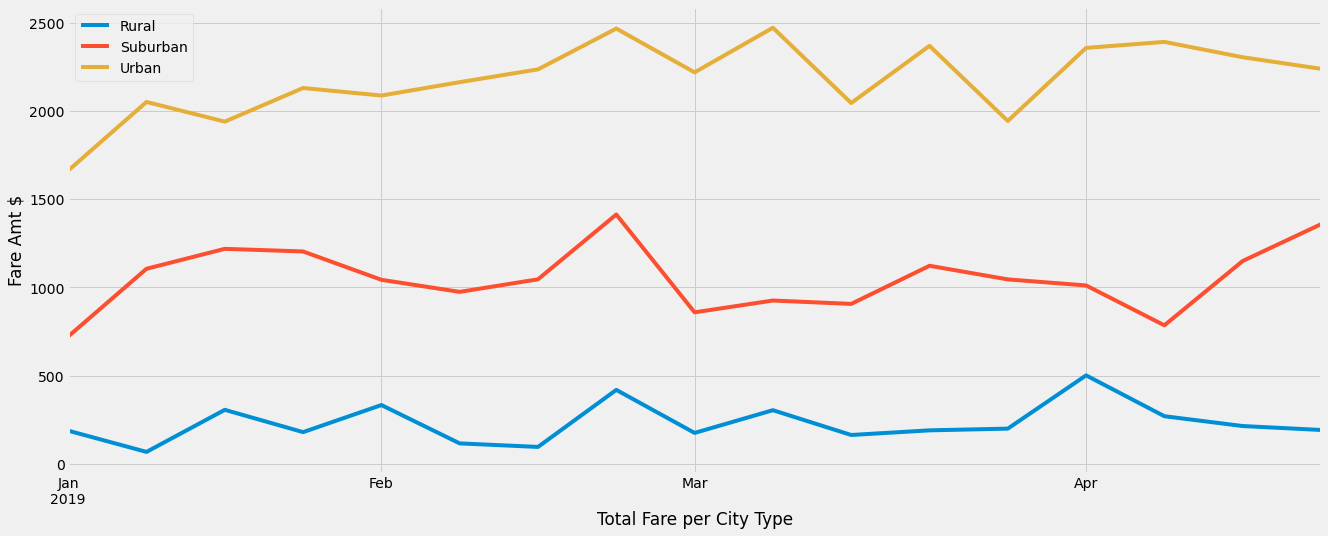

In [268]:
pyber_loc_pivot_resample.plot(figsize=(20,8))
plt.ylabel('Fare Amt $')
plt.xlabel('Total Fare per City Type')
plt.legend()

plt.savefig('analysis/Pyber_fare_plot.png')